In [9]:
import importlib
import torch
import numpy as np
from utils import stats, img

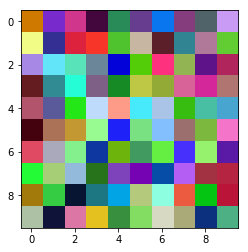

In [18]:
x = img.random_image(1, 10)
img.show_image(x)

In [21]:
print(x.size())
importlib.reload(stats)
xs = stats.all_shifts(x, axis_offset=2)
for i in xs:
    img.show_image(i)

torch.Size([1, 3, 10, 10])


TypeError: 'tuple' object does not support item assignment